# Document Classification with Naive Bayes - Lab

## Introduction

In this lesson, you'll practice implementing the Naive Bayes algorithm on your own.

## Objectives

In this lab you will:  

* Implement document classification using Naive Bayes

# Objectives
YWBAT
* explain how Bayesian methods classify data
* some examples of good use cases for Bayesian methods
* explaining the importance of some of the hyper-parameters of Bayesian methods

# Scenario
In general, you are handed data with a target that specifies a class. Maybe that class is, is the row a blue row or red row? Is this row the row of a customer that is staying with their subscription or cancelling their subscription? Either way, the scenario is about classifying data. 


Specifically Bayesian methods are used when going through text data. 

In general a Bayesian method for a X_train of [x1, x2, x3] and a target of y=0 or y=1 asks
* For a given new row of data D
* What is P(D=1|x1=d1)? 
* What is the P(D=1|x2=d2)?
* What is the P(D=1|x3=d3)?


# Bayesian Models
* Features are independent
* The columns don't affect one another

## Import the dataset

To start, import the dataset stored in the text file `'SMSSpamCollection'`.

In [56]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns 

# Iris Dataset example
$$P(F=setosa|sl=4.2, sw=4.1, pl=2.2, pw=2.8) = P(sl=4.2|setosa)*P(sw=4.1|setosa)*P(pl=2.2|setosa)*P(pw=2.8|setosa) * P(setosa)$$

# Garbage in, Garbage out
* If you pass in data that isn't separable, you'll have a model that can't separate it. 
* Feature Engineering and data handling has to become is about separating your classes

## Account for class imbalance

To help your algorithm perform more accurately, subset the dataset so that the two classes are of equal size. To do this, keep all of the instances of the minority class (spam) and subset examples of the majority class (ham) to an equal number of examples.

In [8]:
df = pd.read_csv("SMSSpamCollection", delimiter='\t', names=['label', 'SMS'])
df.head()

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['SMS'][0].split(" ")

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [11]:
df['SMS'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [19]:
df.shape

(5572, 2)

# NLP - is the art of transforming text data into numerical data

# We're going to use a Bag of Words model! I'll explain this later...

In [13]:
vectorizer = CountVectorizer()

In [14]:
vecs = vectorizer.fit_transform(df['SMS'])

In [39]:
vecs.shape

(5572, 8713)

In [36]:
feature_names = vectorizer.get_feature_names()

In [35]:
non_zero_vals = np.where(vecs.todense()[0]>0)[1]
non_zero_vals

array([1082, 1316, 1765, 1767, 2061, 2338, 3571, 3615, 3655, 4114, 4374,
       4501, 5571, 5958, 7694, 8084, 8324, 8548])

In [38]:
for non_zero_val in non_zero_vals:
    print(feature_names[non_zero_val])

amore
available
buffet
bugis
cine
crazy
go
got
great
in
jurong
la
only
point
there
until
wat
world


In [43]:
df_bow = pd.DataFrame(data=vecs.todense(), columns=feature_names)
df_bow['label'] = df['label']
df_bow.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


# Notice we have class imbalance

In [55]:

df_bow['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Train-test split

Now implement a train-test split on the dataset: 

In [46]:
X = df_bow.drop(columns=['label'])
y = df_bow['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Create the word frequency dictionary for each class

Create a word frequency dictionary for each class: 

In [ ]:
# Your code here

## Count the total corpus words
Calculate V, the total number of words in the corpus: 

In [ ]:
# Your code here

## Create a bag of words function

Before implementing the entire Naive Bayes algorithm, create a helper function `bag_it()` to create a bag of words representation from a document's text.

In [ ]:
# Your code here

## Implementing Naive Bayes

Now, implement a master function to build a naive Bayes classifier. Be sure to use the logarithmic probabilities to avoid underflow.

In [47]:
bayes = GaussianNB()

In [48]:
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# what does it mean when train score is much higher than test score?
# overfitting
bayes.score(X_train, y_train), bayes.score(X_test, y_test)

(0.9518581081081081, 0.8660287081339713)

In [52]:
bern_bayes = BernoulliNB()

In [53]:
bern_bayes.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [57]:
bern_bayes.score(X_train, y_train), bern_bayes.score(X_test, y_test)

(0.987331081081081, 0.9796650717703349)

In [61]:
def plot_confusion_matrix(ytrue, ypred, labels=None, title=None):
    cm = confusion_matrix(ytrue, ypred)
    plt.figure(figsize=(8, 5))
    if labels is not None:
        sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues'), fmt='0.3g', 
                    xticklabels=labels, yticklabels=labels)
    else:
        sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues'), fmt='0.3g')
    if title is not None:
        plt.title(title) 
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [59]:
y_test_bayes = bayes.predict(X_test)
y_test_bern = bern_bayes.predict(X_test)

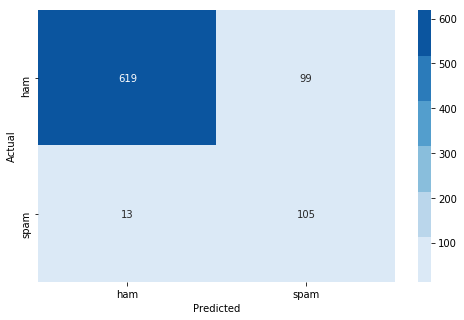

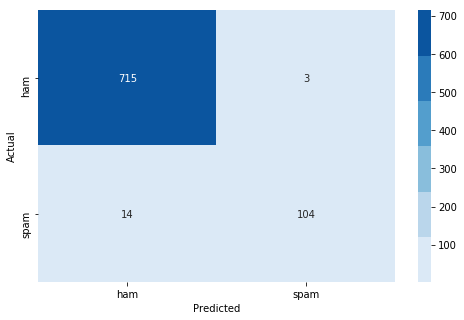

In [62]:
labels = ["ham", "spam"]
plot_confusion_matrix(y_test, y_test_bayes, labels=labels)
plot_confusion_matrix(y_test, y_test_bern, labels=labels)

# Manually tuning your model to get your own labels

In [72]:
X_test.drop(columns=['spam_prob'], inplace=True)

In [73]:
df_test = X_test.copy()
spam_probs = bern_bayes.predict_proba(X_test)[:, 1]
df_test['label'] = y_test
df_test['spam_prob'] = spam_probs

In [74]:
df_test.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud,label,spam_prob
2148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,1.084299e-11
4030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,3.345589e-11
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,2.713705e-12
3049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,3.398060e-10
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,1.282531e-11


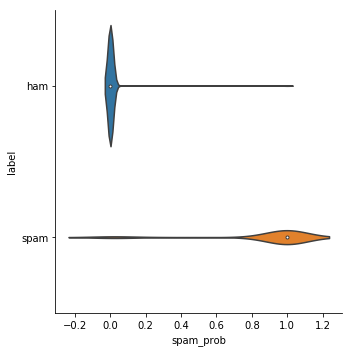

In [80]:
sns.catplot(x='spam_prob', y='label', orient='h', data=df_test, kind='violin')
plt.show()

In [81]:
df_test['predicted_label'] = bern_bayes.predict(X_test)
df_test.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud,label,spam_prob,predicted_label
2148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,1.084299e-11,ham
4030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,3.345589e-11,ham
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,2.713705e-12,ham
3049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,3.398060e-10,ham
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,1.282531e-11,ham


In [82]:
df_test['correct'] = df_test['label']==df_test['predicted_label']
df_test.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud,label,spam_prob,predicted_label
2148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,1.084299e-11,ham
4030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,3.345589e-11,ham
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,2.713705e-12,ham
3049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,3.398060e-10,ham
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,1.282531e-11,ham


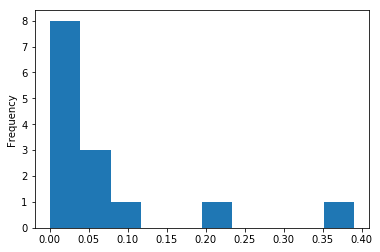

In [87]:
df_test_inc_spam = df_test.loc[(df_test['correct']==False) & (df_test['label']=='spam')]
df_test_inc_spam['spam_prob'].plot('hist')

In [98]:
# let's try a 20% threshold to make our labels

def bern_labels(X_test, thresh=0.20):
    """
    custom predict method
    """
    probs = bern_bayes.predict_proba(X_test)[:, 1]
    labels = []
    for prob in probs:
        if prob >= thresh:
            labels.append('spam')
        else:
            labels.append('ham')
    return labels

In [101]:
bern_bayes.predict_custom = bern_labels

In [102]:
new_labels = bern_bayes.predict_custom(X_test)

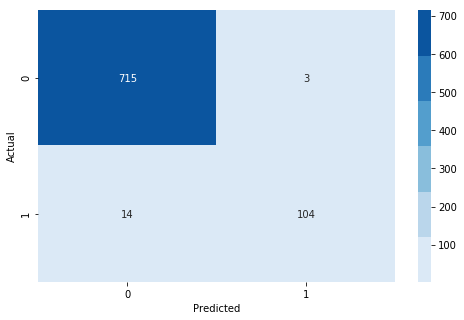

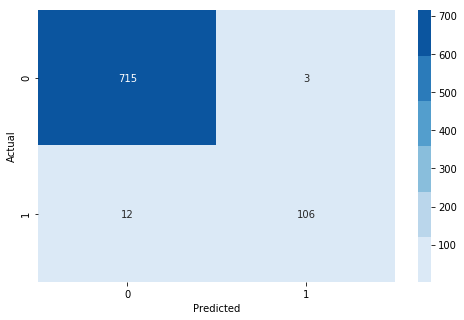

In [103]:
plot_confusion_matrix(y_test, y_test_bern)
plot_confusion_matrix(y_test, new_labels)

# ssooooopppper business stuff
* making decision that causes the least of amount of damage for the highest amount of gain

We would do a cost benefit analysis to find the best threshold

# What did we learn today?
* CountVectorizer in sklearn exists and is awesome
* .todense() and how it converts a sparse matrix to a dense matrix
* how to use cost benefit analysis to turn this into a business project 
* dealing with word text is about transforming it into numerical forms
* Bernoulli Bayes did well in modeling
* We can tweak thresholds for labeling data 
* Keeping relevant information in your df

In [ ]:
# Your code here
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    pass

## Test your classifier

Finally, test your classifier and measure its accuracy. Don't be perturbed if your results are sub-par; industry use cases would require substantial additional preprocessing before implementing the algorithm in practice.

In [ ]:
# Your code here


## Level up (Optional)

Rework your code into an appropriate class structure so that you could easily implement the algorithm on any given dataset.

## Summary

Well done! In this lab, you practiced implementing Naive Bayes for document classification!